In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns
import pandas as pd
from pandas import DataFrame, Series
import altair as alt
from numpy import linalg as LA
from google.colab import files, drive

In [3]:
!pip install "vegafusion-python-embed>=1.5.0" "vegafusion>=1.5.0" "vl-convert-python>=1.6.0" tabulate statsmodels matplotlib-venn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.1/25.1 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.5/20.5 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 130.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 78.1 MB/s eta 0:00:00
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45388 sha256=4520876c1dca0bcfed93ed96992e0a075097f831b41d6a828d9a0160213eaf60
  Stored in directory: /root/.cache/pip/wheels/c4/16/4a/93374cd955bbe0553a8ce74db7f0fbd5fcc876e19fb78bd601
Successfully built matplotlib-venn


In [ ]:
drive.mount('/content/drive/')

# Pre Procesing

## Load data

In [4]:
filenames = ["production_indices_food.csv","food_security.csv","employment_indicators.csv", "annual_population.csv", "emissions.csv", "temperature_change.csv","pesticides_use.csv"]
df_names = ["df_food","df_food_security","df_employment","df_annual_population", "df_emissions", "df_temperatur_change","df_pesticides_use"]

for filename, df_name in zip(filenames, df_names):
    file_path = f"/content/drive/MyDrive/My/DS/{filename}"
    globals()[df_name] = pd.read_csv(file_path)


In [5]:
df_emissions.head()

Domain Code            Domain  Area Code (M49)         Area  Element Code  \
0          GT  Emissions totals                4  Afghanistan          7273   
1          GT  Emissions totals                4  Afghanistan          7273   
2          GT  Emissions totals                4  Afghanistan          7273   
3          GT  Emissions totals                4  Afghanistan          7273   
4          GT  Emissions totals                4  Afghanistan          7273   

           Element  Item Code                         Item  Year Code  Year  \
0  Emissions (CO2)      67292  Drained organic soils (CO2)       1990  1990   
1  Emissions (CO2)      67292  Drained organic soils (CO2)       1991  1991   
2  Emissions (CO2)      67292  Drained organic soils (CO2)       1992  1992   
3  Emissions (CO2)      67292  Drained organic soils (CO2)       1993  1993   
4  Emissions (CO2)      67292  Drained organic soils (CO2)       1994  1994   

   Source Code      Source Unit  Value Flag Flag Description  Note  
0         3050  FAO TIER 1   kt    0.0    E  Estimated value   NaN  
1         3050  FAO TIER 1   kt    0.0    E  Estimated value   NaN  
2         3050  FAO TIER 1   kt    0.0    E  Estimated value   NaN  
3         3050  FAO TIER 1   kt    0.0    E  Estimated value   NaN  
4         3050  FAO TIER 1   kt    0.0    E  Estimated value   NaN

In [ ]:
df_food_security['Year'].unique()

array(['2000-2002', '2001-2003', '2002-2004', '2003-2005', '2004-2006',
       '2005-2007', '2006-2008', '2007-2009', '2008-2010', '2009-2011',
       '2010-2012', '2011-2013', '2012-2014', '2013-2015', '2014-2016',
       '2015-2017', '2016-2018', '2017-2019', '2018-2020', '2019-2021',
       '2020-2022', '2021-2023', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023'], dtype=object)

## Aggregate data


**Reasoning**:
Aggregate the 'food_security' and 'emissions' dataframes by 'Area' and 'Year' and calculate the mean of the 'Value' column, then rename the columns as instructed.

In [6]:

# remove raw with year value is include '-'

df_food_security = df_food_security[df_food_security['Value'] != '-'] # Remove rows where Value is '-'
df_food_security['Value'] = pd.to_numeric(df_food_security['Value'], errors='coerce') # Convert Value to numeric, coercing errors

# Modify the 'Year' column to extract only the starting year for ranges and keep single years
df_food_security['Year'] = df_food_security['Year'].astype(str).apply(lambda x: x.split('-')[0]).astype(int)

df_food_security_agg = df_food_security.groupby(['Area', 'Year'])['Value'].mean().reset_index()
df_food_security_agg = df_food_security_agg.rename(columns={'Value': 'food_security_value'})


df_employment = df_employment[df_employment['Value'] != '-'] # Remove rows where Value is '-'
df_employment['Value'] = pd.to_numeric(df_employment['Value'], errors='coerce') # Convert Value to numeric, coercing errors

# Modify the 'Year' column in df_emissions as well if it contains ranges
df_employment['Year'] = df_employment['Year'].astype(str).apply(lambda x: x.split('-')[0]).astype(int)

df_employment_agg = df_employment.groupby(['Area', 'Year'])['Value'].mean().reset_index()
df_employment_agg = df_employment_agg.rename(columns={'Value': 'emissions_value'}) # Renamed emissions value



df_emissions = df_emissions[df_emissions['Value'] != '-'] # Remove rows where Value is '-'
df_emissions['Value'] = pd.to_numeric(df_emissions['Value'], errors='coerce') # Convert Value to numeric, coercing errors

# Modify the 'Year' column in df_emissions as well if it contains ranges
df_emissions['Year'] = df_emissions['Year'].astype(str).apply(lambda x: x.split('-')[0]).astype(int)

df_emissions_agg = df_emissions.groupby(['Area', 'Year'])['Value'].mean().reset_index()
df_emissions_agg = df_emissions_agg.rename(columns={'Value': 'emissions_value'}) # Renamed emissions value

display(df_food_security_agg.head())
display(df_emissions_agg.head())
display(df_employment_agg[df_employment_agg['Area']=='China'])



Area  Year  food_security_value
0  Afghanistan  2000           274.148621
1  Afghanistan  2001           284.121071
2  Afghanistan  2002           328.405333
3  Afghanistan  2003           331.647000
4  Afghanistan  2004           311.805625

Area  Year  emissions_value
0  Afghanistan  1961       166.085125
1  Afghanistan  1962       231.487375
2  Afghanistan  1963       238.091300
3  Afghanistan  1964       284.000025
4  Afghanistan  1965       339.829375

Area  Year  emissions_value
1314  China  1991    384642.480000
1315  China  1992    381288.610000
1316  China  1993    370289.340000
1317  China  1994    359708.830000
1318  China  1995    349563.170000
1319  China  1996    341951.100000
1320  China  1997    342059.870000
1321  China  1998    345670.300000
1322  China  1999    351707.600000
1323  China  2000    265183.660000
1324  China  2001    267677.096667
1325  China  2002    270079.880000
1326  China  2003    266714.230000
1327  China  2004    257446.896667
1328  China  2005    248163.756667
1329  China  2006    238044.523333
1330  China  2007    229448.850000
1331  China  2008    225776.193333
1332  China  2009    220629.196667
1333  China  2010    216213.910000
1334  China  2011    209250.063333
1335  China  2012    205255.693333
1336  China  2013    193312.550000
1337  China  2014    182971.976667
1338  China  2015    176056.456667
1339  China  2016    171411.330000
1340  China  2017    166611.963333
1341  China  2018    161942.643333
1342  China  2019    156586.633333
1343  China  2020    149842.070000
1344  China  2021    146970.830000
1345  China  2022    169882.860000

In [7]:
# convert the df_food value to percentage  (current value - prev value)/prev value. the first value in the area in the first year is 0.

df_food = df_food.sort_values(by=['Area', 'Year'])

df_food['food_value'] = df_food.groupby('Area')['Value'].pct_change().fillna(0)


display(df_food.head())

Domain Code              Domain  Area Code (M49)         Area  Element Code  \
0          QI  Production Indices                4  Afghanistan           432   
1          QI  Production Indices                4  Afghanistan           432   
2          QI  Production Indices                4  Afghanistan           432   
3          QI  Production Indices                4  Afghanistan           432   
4          QI  Production Indices                4  Afghanistan           432   

                                           Element Item Code (CPC)  Item  \
0  Gross Production Index Number (2014-2016 = 100)           F2054  Food   
1  Gross Production Index Number (2014-2016 = 100)           F2054  Food   
2  Gross Production Index Number (2014-2016 = 100)           F2054  Food   
3  Gross Production Index Number (2014-2016 = 100)           F2054  Food   
4  Gross Production Index Number (2014-2016 = 100)           F2054  Food   

   Year Code  Year  Unit  Value Flag Flag Description  food_value  
0       1961  1961   NaN  41.00    E  Estimated value    0.000000  
1       1962  1962   NaN  41.34    E  Estimated value    0.008293  
2       1963  1963   NaN  41.16    E  Estimated value   -0.004354  
3       1964  1964   NaN  44.60    E  Estimated value    0.083576  
4       1965  1965   NaN  46.70    E  Estimated value    0.047085

In [8]:
# Count unique areas
num_countries = df_food['Area'].nunique()

# Count unique years
num_years = df_food['Year'].nunique()

print(f"מספר המדינות (אזורים) בנתונים: {num_countries}")
print(f"מספר השנים בנתונים: {num_years}")


מספר המדינות (אזורים) בנתונים: 199
מספר השנים בנתונים: 63


In [ ]:
for df_name in df_names:
    df = globals()[df_name]
    if df['Year'].dtypes == 'object':
        df = df[~df['Year'].str.contains('-')]
        # Convert 'Year' to numeric, but fill NaN with -1 before converting to int
        df['Year'] = pd.to_numeric(df['Year'], errors='coerce').fillna(-1).astype(int)
    if df['Value'].dtypes == 'object':
        df['Value'] = pd.to_numeric(df['Value'], errors='coerce').astype(float)
    globals()[df_name] = df

for df_name in df_names:
    df = globals()[df_name]
    print(f"___ {df_name} ___")
    print(df['Year'].dtypes)
    print(df['Area'].dtypes)
    print(df['Value'].dtypes)

df_emissions_agg

df_food.describe()

___ df_food ___
int64
object
float64
___ df_food_security ___
int64
object
float64
___ df_employment ___
int64
object
float64
___ df_annual_population ___
int64
object
float64
___ df_emissions ___
int64
object
float64
___ df_temperatur_change ___
int64
object
float64
___ df_pesticides_use ___
int64
object
float64


Area Code (M49)  Element Code     Year Code          Year  Unit  \
count     11398.000000       11398.0  11398.000000  11398.000000   0.0   
mean        426.959905         432.0   1993.254167   1993.254167   NaN   
std         250.559903           0.0     18.234944     18.234944   NaN   
min           4.000000         432.0   1961.000000   1961.000000   NaN   
25%         208.000000         432.0   1977.000000   1977.000000   NaN   
50%         418.000000         432.0   1994.000000   1994.000000   NaN   
75%         640.000000         432.0   2009.000000   2009.000000   NaN   
max         894.000000         432.0   2023.000000   2023.000000   NaN   

              Value    food_value  
count  11398.000000  11398.000000  
mean      79.031047      0.023434  
std       54.585876      0.125222  
min        3.080000     -0.858130  
25%       47.092500     -0.015638  
50%       78.365000      0.018737  
75%       99.767500      0.056072  
max      754.480000      7.450435

## Explore Data



---

> Visualization Data pre clean befor merge




In [9]:

# Aggregate 'food_value' by 'Year' and 'Area'
agg_food_df = df_food.groupby(['Year', 'Area'])[['Value']].mean().reset_index()

# Melt the dataframe to long format for plotting
melted_agg_food_df = agg_food_df.melt(id_vars=['Year', 'Area'], value_vars=['Value'], var_name='value_type', value_name='value')

import altair as alt
alt.data_transformers.enable("vegafusion") # Enable VegaFusion data transformer

# Create a line chart for food_value
chart_food = alt.Chart(melted_agg_food_df).mark_line().encode(
    x='Year:O',  # Use 'Year' as ordinal on the x-axis
    y='value:Q',  # Use the melted 'value' on the y-axis
    color='Area:N',  # Color by Area
    tooltip=['Area', 'Year', 'value_type', 'value']  # Add tooltips
).properties(
    title='Food Value Change Over Time (Horizontal)',  # Add a title
    width='container' # Make the chart responsive to the container width
).interactive() # Make interactive

# Display the chart
chart_food

alt.Chart(...)

In [16]:

# prompt: show year 2000-2024

import altair as alt

alt.data_transformers.enable("vegafusion") # Enable VegaFusion data transformer

# Assuming df_food has 'Area', 'Year', and 'Value' columns
# Create a line chart with 'Year' on the x-axis and 'Value' on the y-axis

df_food_filtered = df_food[df_food['Year'].between(2000, 2024)]

# chart = alt.Chart(df_food[df['Area']=='Mexico']).mark_line().encode(

chart = alt.Chart(df_food_filtered).mark_line().encode(
    x='Year:O',  # Treat Year as an ordinal variable
    y='Value:Q',  # Treat Value as a quantitative variable
    color='Area:N',  # Use Area to define different lines (color encoding)
    tooltip=['Area', 'Year', 'Value'] # Add tooltips for interactivity
).properties(
    title='Food Production Index (2000-2024) Over Time by Area'  # Add a title to the chart
).interactive() # Make the chart interactive.
chart.show()
chart.save('chart_food_first.html')


df_food['Value'].isnull().sum()

alt.Chart(...)

np.int64(0)

## Mearge to one DataFrame

In [11]:
# merage the df to one with col: area ,year, <df_name>_vlaue

# ### Subtask:
# Merge all dataframes into a single dataframe based on 'Area' and 'Year', using an outer merge. Filter the merged dataframe to include data from 1961 onwards.

merged_df = DataFrame()

# List of dataframes to merge, selecting necessary columns and renaming 'Value'
# Use the aggregated dataframes for food security and emissions
dataframes_to_merge = []

# Dynamically create the list of dataframes to merge
for df_name in df_names:
    df = globals()[df_name]
    if df_name == 'df_food':
        if isinstance(df, pd.DataFrame) and 'Value' in df.columns:
            df['Year'] = df['Year'].astype(str).str.split('-').str[0].astype(int)
            dataframes_to_merge.append(df[['Area', 'Year', 'Value']].rename(columns={'Value': 'food_value'}))
        else:
            print(f"Warning: Dataframe '{df_name}' not found or does not have a 'Value' column. Skipping.")
    # Modified elif condition based on user request
    elif df_name in ['df_food_security', 'df_emissions', 'df_employment']:
        # Use the aggregated dataframes directly
        agg_df_name = f'{df_name}_agg'
        if agg_df_name in globals() and isinstance(globals()[agg_df_name], pd.DataFrame):
             globals()[agg_df_name]['Year'] = globals()[agg_df_name]['Year'].astype(int)
             # Rename the value column based on the dataframe name
             if df_name == 'df_employment':
                  dataframes_to_merge.append(globals()[agg_df_name].rename(columns={'emissions_value': 'employment_value'})) # Renaming emissions_value to employment_value
             else:
                 # Assuming the aggregated dataframes already have the desired value column name
                 dataframes_to_merge.append(globals()[agg_df_name])
        else:
            print(f"Warning: Aggregated dataframe '{agg_df_name}' not found. Skipping.")
            # If aggregated not found, try using the non-aggregated with 'Value' column
            if df_name in globals() and isinstance(globals()[df_name], pd.DataFrame) and 'Value' in globals()[df_name].columns:
                 # Ensure 'Year' is integer type in non-aggregated dataframes
                 globals()[df_name]['Year'] = globals()[df_name]['Year'].astype(str).str.split('-').str[0].astype(int)
                 dataframes_to_merge.append(globals()[df_name][['Area', 'Year', 'Value']].rename(columns={'Value': f'{df_name.removeprefix("df_")}_value'}))
                 print(f"Using non-aggregated '{df_name}' instead.")
            else:
                 print(f"Warning: Dataframe '{df_name}' not found or does not have a 'Value' column. Skipping.")

    elif df_name in ['df_annual_population', 'df_temperatur_change', 'df_pesticides_use']:
         if isinstance(df, pd.DataFrame) and 'Value' in df.columns:
             df['Year'] = df['Year'].astype(str).str.split('-').str[0].astype(int)
             dataframes_to_merge.append(df[['Area', 'Year', 'Value']].rename(columns={'Value': f'{df_name.removeprefix("df_")}_value'}))
         else:
              print(f"Warning: Dataframe '{df_name}' not found or does not have a 'Value' column. Skipping.")


# Initialize the merged_df with the first dataframe in the list
if dataframes_to_merge:
    merged_df = dataframes_to_merge[0]
    # Merge the remaining dataframes iteratively
    for df_to_merge in dataframes_to_merge[1:]:
        merged_df = pd.merge(merged_df, df_to_merge, on=['Area', 'Year'], how='outer')

# Filter the merged dataframe to include data from 1961 onwards
if not merged_df.empty:
    merged_df = merged_df[merged_df['Year'] >= 1961].copy()

# Display the first few rows of the final merged and filtered dataframe
if not merged_df.empty:
    display(merged_df.head())
else:
    print("No dataframes were successfully merged.")

Area  Year  food_value  food_security_value  employment_value  \
11  Afghanistan  1961       41.00                  NaN               NaN   
12  Afghanistan  1962       41.34                  NaN               NaN   
13  Afghanistan  1963       41.16                  NaN               NaN   
14  Afghanistan  1964       44.60                  NaN               NaN   
15  Afghanistan  1965       46.70                  NaN               NaN   

    annual_population_value  emissions_value  temperatur_change_value  \
11                 9214.083       166.085125                   -0.096   
12                 9404.406       231.487375                   -0.143   
13                 9604.487       238.091300                    0.848   
14                 9814.318       284.000025                   -0.762   
15                10036.008       339.829375                   -0.233   

    pesticides_use_value  
11                   NaN  
12                   NaN  
13                   NaN  
14                   NaN  
15                   NaN

## visualization data

In [12]:
# Count unique areas
num_countries = merged_df['Area'].nunique()

# Count unique years
num_years = merged_df['Year'].nunique()

print(f"מספר המדינות (אזורים) בנתונים: {num_countries}")
print(f"מספר השנים בנתונים: {num_years}")

מספר המדינות (אזורים) בנתונים: 257
מספר השנים בנתונים: 64


In [13]:
merged_df.shape

(14891, 9)

In [14]:
value_cols = [col for col in merged_df.columns if '_value' in col]
value_cols

['food_value',
 'food_security_value',
 'employment_value',
 'annual_population_value',
 'emissions_value',
 'temperatur_change_value',
 'pesticides_use_value']

In [15]:
# Nan values
merged_df.isnull().sum()

Area                          0
Year                          0
food_value                 3493
food_security_value        9995
employment_value           7523
annual_population_value    1196
emissions_value            1963
temperatur_change_value     952
pesticides_use_value       8029
dtype: int64

In [ ]:
# prompt: show year 2000-2024

import altair as alt

alt.data_transformers.enable("vegafusion") # Enable VegaFusion data transformer

# Assuming df_food has 'Area', 'Year', and 'Value' columns
# Create a line chart with 'Year' on the x-axis and 'Value' on the y-axis
# df_food_filtered = df_merge_food[df_merge_food['Area']=='Albania']
df_food_filtered = merged_df[merged_df['Area']=='Israel']

# chart = alt.Chart(df_food[df['Area']=='Mexico']).mark_line().encode(

chart = alt.Chart(df_food_filtered).mark_line().encode(
    x='Year:O',  # Treat Year as an ordinal variable
    y='food_value:Q',  # Treat Value as a quantitative variable
    color='Area:N',  # Use Area to define different lines (color encoding)
    tooltip=['Area', 'Year', 'pesticides_use_value'] # Add tooltips for interactivity
).properties(
    title='Pesticides Use Value (2000-2024) Over Time by Area'  # Add a title to the chart
).interactive() # Make the chart interactive.

chart

alt.Chart(...)

In [ ]:
display(merged_df)

Area  Year  food_value  food_security_value  employment_value  \
11     Afghanistan  1961       41.00                  NaN               NaN   
12     Afghanistan  1962       41.34                  NaN               NaN   
13     Afghanistan  1963       41.16                  NaN               NaN   
14     Afghanistan  1964       44.60                  NaN               NaN   
15     Afghanistan  1965       46.70                  NaN               NaN   
...            ...   ...         ...                  ...               ...   
17133     Zimbabwe  2020      129.67           274.767955       2121.710000   
17134     Zimbabwe  2021      133.23           354.214118       1334.644118   
17135     Zimbabwe  2022      131.63           539.079444       1140.049375   
17136     Zimbabwe  2023      137.23          1016.165000               NaN   
17137     Zimbabwe  2024         NaN                  NaN               NaN   

       annual_population_value  emissions_value  temperatur_change_value  \
11                    9214.083       166.085125                   -0.096   
12                    9404.406       231.487375                   -0.143   
13                    9604.487       238.091300                    0.848   
14                    9814.318       284.000025                   -0.762   
15                   10036.008       339.829375                   -0.233   
...                        ...              ...                      ...   
17133                15526.888      6929.785386                    0.669   
17134                15797.210      7010.127207                    0.233   
17135                16069.056      6986.685864                    0.494   
17136                16340.822              NaN                    1.009   
17137                      NaN              NaN                    1.523   

       pesticides_use_value  
11                      NaN  
12                      NaN  
13                      NaN  
14                      NaN  
15                      NaN  
...                     ...  
17133               2185.07  
17134               2185.07  
17135               2185.07  
17136                   NaN  
17137                   NaN  

[14891 rows x 9 columns]

#### show area, year and value of the outliers by eatch column

## Clean

In [21]:
cleaned_food = merged_df.copy()

min_year = 2000
max_year = 2024

### Remove area with not food_value data

need to consider this remove if nesussery

In [22]:
#remove from df_merge_food row with food_value nan

cleaned_food = cleaned_food.dropna(subset=['food_value'])

### Normilaize

In [23]:
numeric_cols = value_cols
# numeric_cols = cleaned_df.select_dtypes(include=np.float64).columns

cleaned_food = cleaned_food.copy()  # Create a copy of the DataFrame
cleaned_food[numeric_cols] = (cleaned_food[numeric_cols] - cleaned_food[numeric_cols].mean()) / cleaned_food[numeric_cols].std()

display(cleaned_food.head())

cleaned_food.describe()

cleaned_food.head()

cleaned_food[cleaned_food['Area']=='Singapore']


Area  Year  food_value  food_security_value  employment_value  \
11  Afghanistan  1961   -0.696720                  NaN               NaN   
12  Afghanistan  1962   -0.690491                  NaN               NaN   
13  Afghanistan  1963   -0.693788                  NaN               NaN   
14  Afghanistan  1964   -0.630768                  NaN               NaN   
15  Afghanistan  1965   -0.592297                  NaN               NaN   

    annual_population_value  emissions_value  temperatur_change_value  \
11                -0.184606        -0.231083                -0.986327   
12                -0.183278        -0.230250                -1.056134   
13                -0.181882        -0.230165                 0.415756   
14                -0.180418        -0.229580                -1.975508   
15                -0.178871        -0.228869                -1.189807   

    pesticides_use_value  
11                   NaN  
12                   NaN  
13                   NaN  
14                   NaN  
15                   NaN

Area  Year  food_value  food_security_value  employment_value  \
13890  Singapore  1961    3.569036                  NaN               NaN   
13891  Singapore  1962    3.591203                  NaN               NaN   
13892  Singapore  1963    3.729700                  NaN               NaN   
13893  Singapore  1964    3.717243                  NaN               NaN   
13894  Singapore  1965    4.019702                  NaN               NaN   
...          ...   ...         ...                  ...               ...   
13948  Singapore  2019    0.803119             2.998454          0.034524   
13949  Singapore  2020    0.811180             3.008404          0.058007   
13950  Singapore  2021    0.992362             3.909706         -0.156479   
13951  Singapore  2022    0.950043             7.452020         -0.143078   
13952  Singapore  2023    0.925861            -0.048459               NaN   

       annual_population_value  emissions_value  temperatur_change_value  \
13890                -0.237239        -0.224115                      NaN   
13891                -0.236885        -0.222292                      NaN   
13892                -0.236534        -0.218819                      NaN   
13893                -0.236185        -0.217509                      NaN   
13894                -0.235841        -0.222621                      NaN   
...                        ...              ...                      ...   
13948                -0.209337        -0.186374                 1.532669   
13949                -0.209681        -0.166348                 0.674191   
13950                -0.210197        -0.166252                 0.996491   
13951                -0.209474        -0.167540                 0.604384   
13952                -0.208503              NaN                 1.078180   

       pesticides_use_value  
13890                   NaN  
13891                   NaN  
13892                   NaN  
13893                   NaN  
13894                   NaN  
...                     ...  
13948                   NaN  
13949                   NaN  
13950                   NaN  
13951                   NaN  
13952                   NaN  

[63 rows x 9 columns]

### show area are missing value for years 1961-2024 which year are missing.

### which area you seguessed to remove and which sugeessges to complite

In [24]:

cleaned_food.isnull().sum()

# show me area are missing value for years 1961-2024 which year are missing. which area you seguessed to remove and which you sugeessges to complite

# Get all possible years in the range
all_years = pd.Series(range(min_year, max_year))

# Group by Area and check for missing years
for area in cleaned_food['Area'].unique():
    area_df = cleaned_food[cleaned_food['Area'] == area]
    present_years = area_df['Year'].unique()
    missing_years = all_years[~all_years.isin(present_years)].tolist()

    if missing_years:
        print(f"\nArea: {area}")
        print(f"Missing Years: {missing_years}")

print("\n--- Suggestions for Missing Values ---")
print("Areas with a large number of missing years might be candidates for removal if they don't contribute significantly to the overall analysis or if imputation would introduce too much noise.")
print("Areas with a smaller number of missing years or specific missing values in certain columns might be good candidates for completion using imputation techniques.")
print("\nTo make concrete suggestions, we would need to evaluate:")
print("- The number of missing years per area.")
print("- The percentage of missing values per column.")
print("- The nature of the data (e.g., time series patterns, correlations between columns).")
print("Based on these factors, we could choose methods like:")
print("- **Dropping Areas**: If an area has a high proportion of missing data across many years/columns.")
print("- **Imputation**: ")
print("  - **Forward fill (ffill)** or **Backward fill (bfill)** for time series data if missing values are consecutive.")
print("  - **Interpolation** (e.g., linear, polynomial) for smoother data over time.")
print("  - **Mean, Median, or Mode imputation** if missingness is not time-dependent and distributions are not skewed.")
print("  - **Model-based imputation** (e.g., using regression or machine learning models) if relationships between features can be leveraged.")

# Example of how to identify columns with missing values for potential completion
missing_cols = cleaned_food.isnull().sum()
missing_cols = missing_cols[missing_cols > 0]
if not missing_cols.empty:
    print("\nColumns with missing values across areas:")
    print(missing_cols.to_markdown(numalign="left", stralign="left"))
    print("\nConsider completing these columns using imputation methods appropriate for the data type and distribution.")


Area: Montenegro
Missing Years: [2000, 2001, 2002, 2003, 2004, 2005]

Area: Serbia
Missing Years: [2000, 2001, 2002, 2003, 2004, 2005]

Area: South Sudan
Missing Years: [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]

Area: Sudan
Missing Years: [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]

Area: Venezuela (Bolivarian Republic of)
Missing Years: [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

Area: Zambia
Missing Years: [2000, 2001, 2002, 2003, 2004]

Area: Zimbabwe
Missing Years: [2008, 2009]

--- Suggestions for Missing Values ---
Areas with a large number of missing years might be candidates for removal if they don't contribute significantly to the overall analysis or if imputation would introduce too much noise.
Areas with a smaller number of missing years or specific missing values in certain columns might be good candidates for completion using imputation techniques.

To make concrete suggestions, we would need to evalu

### drop area row are not have data in year 1961-2024 more then 20% for 20% of *_value

In [25]:

### apply
# drop the area are missing value for years 1961-2024 which year are missing more the 40%

# Identify areas where more than 40% of years are missing between 1961 and 2024

# Revert cleaned_df back to a DataFrame from df_merge_df and apply year filtering

cleaned_food = cleaned_food[(cleaned_food['Year'] > min_year) & (cleaned_food['Year'] <= max_year)] # Re-apply year filtering as in cell uAzRI3Dsewoz

print(f"--- Areas with > 40% Missing Data (2000-2023) ---")

# Calculate the total number of years in the range (2000 to 2023 inclusive)
total_years = 2023 - 2000 + 1

# Group by 'Area' and calculate the number of present years
present_years_count = cleaned_food.groupby('Area')['Year'].nunique()


# Calculate the number of missing years
missing_years_count = total_years - present_years_count

# Calculate the percentage of missing years
missing_years_percentage = (missing_years_count / total_years) * 100

# Filter areas where missing years percentage is greater than 40%
areas_to_drop = missing_years_percentage[missing_years_percentage > 25].index.tolist()

if areas_to_drop:
    print("Areas to Drop:")
    for area in areas_to_drop:
        percentage = missing_years_percentage[area]
        num_missing = missing_years_count[area]
        print(f"- {area}: {percentage:.2f}% missing years ({num_missing} years)")

    # Drop the identified areas from the dataframe
    # Ensure we are modifying the correct global variable
    cleaned_food = cleaned_food[~cleaned_food['Area'].isin(areas_to_drop)].reset_index(drop=True)
    print(f"\nDropped {len(areas_to_drop)} areas.")
    print(f"New shape: {cleaned_food.shape}")

else:
    print("No areas have more than 40% missing years in the range 2000-2023. No areas dropped.")

cleaned_food


--- Areas with > 40% Missing Data (2000-2023) ---
Areas to Drop:
- South Sudan: 50.00% missing years (12 years)
- Sudan: 50.00% missing years (12 years)
- Venezuela (Bolivarian Republic of): 41.67% missing years (10 years)

Dropped 3 areas.
New shape: (4492, 9)


Area  Year  food_value  food_security_value  employment_value  \
0     Afghanistan  2001   -0.319516            -0.769525         -0.166153   
1     Afghanistan  2002   -0.078977            -0.730292         -0.172267   
2     Afghanistan  2003   -0.041422            -0.727420         -0.167081   
3     Afghanistan  2004   -0.078428            -0.744998         -0.166302   
4     Afghanistan  2005    0.082603            -0.722461         -0.163586   
...           ...   ...         ...                  ...               ...   
4487     Zimbabwe  2019    0.654363            -0.795099         -0.194233   
4488     Zimbabwe  2020    0.927693            -0.777811         -0.168763   
4489     Zimbabwe  2021    0.992912            -0.707428         -0.197140   
4490     Zimbabwe  2022    0.963600            -0.543650         -0.204156   
4491     Zimbabwe  2023    1.066191            -0.120988               NaN   

      annual_population_value  emissions_value  temperatur_change_value  \
0                   -0.107368        -0.231746                 1.051446   
1                   -0.099736        -0.231536                 1.168781   
2                   -0.090283        -0.231338                -0.023880   
3                   -0.084508        -0.231641                 1.268293   
4                   -0.078620        -0.231020                -0.221419   
...                       ...              ...                      ...   
4487                -0.142344        -0.142743                 0.990550   
4488                -0.140561        -0.144912                 0.149895   
4489                -0.138675        -0.143889                -0.497677   
4490                -0.136778        -0.144187                -0.110025   
4491                -0.134882              NaN                 0.654882   

      pesticides_use_value  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  
...                    ...  
4487             -0.250318  
4488             -0.250318  
4489             -0.250318  
4490             -0.250318  
4491                   NaN  

[4492 rows x 9 columns]

### check whitch year the area exist and if with no nan file

In [ ]:

unique_years = set(cleaned_food['Year'].unique())
lst_area = []
lst_nan_area = []
count = 0

# Iterate over unique areas
for area in cleaned_food['Area'].unique():
    # Filter the dataframe for the current area
    df_area = cleaned_food[cleaned_food['Area'] == area]

    if str(df_area['Year'].min()) != min_year or str(df_area['Year'].max()) != max_year:
    # if 1991 not in (df_area['Year'].values) or 2024 not in (df_area['Year'].values):
        count +=1
        # Fix: Use boolean indexing to keep rows where 'Area' is not equal to the current area
        df = cleaned_food[cleaned_food['Area'] != area]
        print(f'-------- {area} -----> {df_area["Year"].min()} - {df_area["Year"].max()}  \n')

# Update the global variable with the modified dataframe after the loop
# globals()[f'cleaned_{df_name}'] = df
print(count)

cleaned_food

-------- Afghanistan -----> 2001 - 2023  

-------- Albania -----> 2001 - 2023  

-------- Algeria -----> 2001 - 2023  

-------- Angola -----> 2001 - 2023  

-------- Antigua and Barbuda -----> 2001 - 2023  

-------- Argentina -----> 2001 - 2023  

-------- Armenia -----> 2001 - 2023  

-------- Australia -----> 2001 - 2023  

-------- Austria -----> 2001 - 2023  

-------- Azerbaijan -----> 2001 - 2023  

-------- Bahamas -----> 2001 - 2023  

-------- Bahrain -----> 2001 - 2023  

-------- Bangladesh -----> 2001 - 2023  

-------- Barbados -----> 2001 - 2023  

-------- Belarus -----> 2001 - 2023  

-------- Belgium -----> 2001 - 2023  

-------- Belize -----> 2001 - 2023  

-------- Benin -----> 2001 - 2023  

-------- Bhutan -----> 2001 - 2023  

-------- Bolivia (Plurinational State of) -----> 2001 - 2023  

-------- Bosnia and Herzegovina -----> 2001 - 2023  

-------- Botswana -----> 2001 - 2023  

-------- Brazil -----> 2001 - 2023  

-------- Brunei Darussalam -----> 2001 - 

Area  Year  food_value  food_security_value  employment_value  \
0     Afghanistan  2001   -0.319516            -0.769525         -0.166153   
1     Afghanistan  2002   -0.078977            -0.730292         -0.172267   
2     Afghanistan  2003   -0.041422            -0.727420         -0.167081   
3     Afghanistan  2004   -0.078428            -0.744998         -0.166302   
4     Afghanistan  2005    0.082603            -0.722461         -0.163586   
...           ...   ...         ...                  ...               ...   
4432     Zimbabwe  2019    0.654363            -0.795099         -0.194233   
4433     Zimbabwe  2020    0.927693            -0.777811         -0.168763   
4434     Zimbabwe  2021    0.992912            -0.707428         -0.197140   
4435     Zimbabwe  2022    0.963600            -0.543650         -0.204156   
4436     Zimbabwe  2023    1.066191                  NaN               NaN   

      annual_population_value  emissions_value  temperatur_change_value  \
0                   -0.107368        -0.231746                 1.051446   
1                   -0.099736        -0.231536                 1.168781   
2                   -0.090283        -0.231338                -0.023880   
3                   -0.084508        -0.231641                 1.268293   
4                   -0.078620        -0.231020                -0.221419   
...                       ...              ...                      ...   
4432                -0.142344        -0.142743                 0.990550   
4433                -0.140561        -0.144912                 0.149895   
4434                -0.138675        -0.143889                -0.497677   
4435                -0.136778        -0.144187                -0.110025   
4436                -0.134882              NaN                 0.654882   

      pesticides_use_value  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  
...                    ...  
4432             -0.250318  
4433             -0.250318  
4434             -0.250318  
4435             -0.250318  
4436                   NaN  

[4437 rows x 9 columns]

### drop the area are missing value for years 1961-2024 which year are missing more the 40%

In [26]:

# drop area row are not have data in year 1961-2024 more then 20% for 20% of food_value                  ,
# annual_population_value     ,
# emissions_value             ,land_use_value
# temperature_change_value


print(f"--- Areas with > 20% Missing Data (1961-2024) for >20% of value columns for {df_name} ---")

# Calculate the total number of years in the range (1961 to 2024 inclusive)
total_years = max_year - min_year + 1

# Identify value columns
value_cols = [col for col in cleaned_food.columns if '_value' in col]

areas_to_drop_value_coverage = []

for area in cleaned_food['Area'].unique():
    area_df = cleaned_food[cleaned_food['Area'] == area]
    low_coverage_value_cols_count = 0

    for col in value_cols:
        # Calculate the number of non-null values for the current area and value column
        present_values_count = area_df[col].notnull().sum()

        # Calculate the percentage of present values
        present_values_percentage = (present_values_count / total_years) * 100

        # If less than 80% of the years have data for this value column, count it as low coverage
        if present_values_percentage < 80:
            low_coverage_value_cols_count += 1

    # If more than 20% of the value columns have low coverage (<80% of years), mark the area for dropping
    if (low_coverage_value_cols_count / len(value_cols)) > 0.40:
        areas_to_drop_value_coverage.append(area)

if areas_to_drop_value_coverage:
    print("Areas to Drop due to low data coverage in value columns:")
    for area in areas_to_drop_value_coverage:
        print(f"- {area}")

    # Drop the identified areas from the dataframe
    cleaned_food = cleaned_food[~cleaned_food['Area'].isin(areas_to_drop_value_coverage)].reset_index(drop=True)
    print(f"\nDropped {len(areas_to_drop_value_coverage)} areas.")
    print(f"New shape: {cleaned_food.shape}")

else:
    print("No areas have more than 20% of value columns with less than 80% data coverage.")

print("\n")

--- Areas with > 20% Missing Data (1961-2024) for >20% of value columns for df_pesticides_use ---
Areas to Drop due to low data coverage in value columns:
- Montenegro
- Serbia
- Zambia

Dropped 3 areas.
New shape: (4437, 9)




In [ ]:
cleaned_food.shape

(4437, 9)

### remove outliers by mean and std

In [28]:
# Identify columns ending with '_value'
value_cols = [col for col in cleaned_food.columns if col.endswith('_value')]

# Define a threshold for outlier detection (e.g., 3 standard deviations)
outlier_threshold = 3

# Create a copy to avoid modifying the original DataFrame directly if not intended
# df_cleaned = cleaned_food.copy()

# Iterate through each value column and replace outliers with NaN for each area
for col in value_cols:
    cleaned_food[col] = cleaned_food.groupby('Area')[col].transform(
        lambda x: x.mask(np.abs(x - x.mean()) > outlier_threshold * x.std())
    )


print("Outliers replaced with NaN in value columns per area.")
# Display the first few rows and for a specific area to show the changes
display(cleaned_food.head())

Outliers replaced with NaN in value columns per area.


Area  Year  food_value  food_security_value  employment_value  \
0  Afghanistan  2001   -0.319516            -0.769525         -0.166153   
1  Afghanistan  2002   -0.078977            -0.730292         -0.172267   
2  Afghanistan  2003   -0.041422            -0.727420         -0.167081   
3  Afghanistan  2004   -0.078428            -0.744998         -0.166302   
4  Afghanistan  2005    0.082603            -0.722461         -0.163586   

   annual_population_value  emissions_value  temperatur_change_value  \
0                -0.107368        -0.231746                 1.051446   
1                -0.099736        -0.231536                 1.168781   
2                -0.090283        -0.231338                -0.023880   
3                -0.084508        -0.231641                 1.268293   
4                -0.078620        -0.231020                -0.221419   

   pesticides_use_value  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN

In [29]:
display(cleaned_food[cleaned_food['Area']=='China'])

Area  Year  food_value  food_security_value  employment_value  \
782  China  2001   -0.260343            -0.506958          9.405724   
783  China  2002   -0.211429            -0.531318          9.492355   
784  China  2003   -0.194392            -0.478258          9.371008   
785  China  2004   -0.129540            -0.459698          9.036878   
786  China  2005   -0.077878            -0.478947          8.702178   
787  China  2006   -0.048567            -0.410569          8.337334   
788  China  2007   -0.015408            -0.375616          8.027420   
789  China  2008    0.069046            -0.416566          7.895004   
790  China  2009    0.113380            -0.321360          7.709431   
791  China  2010    0.162294            -0.284444          7.550240   
792  China  2011    0.220551            -0.185781          7.299162   
793  China  2012    0.270747            -0.154090          7.155146   
794  China  2013    0.307020            -0.220397          6.724541   
795  China  2014    0.341461            -0.083799          6.351716   
796  China  2015    0.408145            -0.049868          6.102380   
797  China  2016    0.403015            -0.016218          5.934902   
798  China  2017    0.427564            -0.092253          5.761863   
799  China  2018    0.446983             0.062268          5.593513   
800  China  2019    0.449548             0.100651          5.400404   
801  China  2020    0.479592             0.215019          5.157232   
802  China  2021    0.561298             1.008720          5.053710   
803  China  2022    0.609296             1.326752          5.879794   
804  China  2023    0.655462             0.705436               NaN   

     annual_population_value  emissions_value  temperatur_change_value  \
782                 8.879903         3.097221                 0.694984   
783                 8.937956         3.370199                 0.831628   
784                 8.992365         4.016330                 0.375654   
785                 9.046136         4.408446                 0.797467   
786                 9.102231         4.976362                 0.699440   
787                 9.159112         5.526564                 0.971242   
788                 9.214270         5.973414                 1.419790   
789                 9.271132         6.366197                 0.755880   
790                 9.332790         6.705807                 1.122738   
791                 9.396623         7.326481                 0.576164   
792                 9.457969         7.798785                 0.319214   
793                 9.523644         8.024442                 0.083058   
794                 9.590853         8.220791                 0.766277   
795                 9.654111         8.316078                 0.776673   
796                 9.712003         8.210573                 1.096004   
797                 9.768023         8.196775                 1.143532   
798                 9.826617         8.402293                 1.531184   
799                 9.873497         8.676992                 1.229677   
800                 9.905264         8.969438                 1.297998   
801                 9.923346         9.159021                 1.639608   
802                 9.924963         9.508501                 1.694562   
803                 9.915163         9.476330                 1.988643   
804                 9.896246              NaN                 1.963394   

     pesticides_use_value  
782              4.252561  
783              4.416704  
784              4.457823  
785              4.659197  
786              4.904557  
787              5.165856  
788              5.468510  
789              5.626075  
790              5.748835  
791              5.904710  
792              6.011700  
793              6.098273  
794              6.108628  
795              6.075512  
796              6.018407  
797              5.876674  
798              5.602176  
799              5.0

In [30]:
display(cleaned_food.shape)

(4437, 9)

### visualization Data

In [31]:
# Count unique areas
num_countries = cleaned_food['Area'].nunique()

# Count unique years
num_years = cleaned_food['Year'].nunique()

print(f"מספר המדינות (אזורים) בנתונים: {num_countries}")
print(f"מספר השנים בנתונים: {num_years}")


מספר המדינות (אזורים) בנתונים: 193
מספר השנים בנתונים: 23


In [33]:
# prompt: show year 2000-2024

import altair as alt

alt.data_transformers.enable("vegafusion") # Enable VegaFusion data transformer

# Assuming df_food has 'Area', 'Year', and 'Value' columns
# Create a line chart with 'Year' on the x-axis and 'Value' on the y-axis
# df_food_filtered = df_merge_food[df_merge_food['Area']=='Albania']
df_food_filtered = cleaned_food[cleaned_food['Year'].between(2000, 2024)]


# chart = alt.Chart(df_food[df['Area']=='Mexico']).mark_line().encode(

chart = alt.Chart(df_food_filtered).mark_line().encode(
    x='Year:O',  # Treat Year as an ordinal variable
    y='food_value:Q',  # Treat Value as a quantitative variable
    color='Area:N',  # Use Area to define different lines (color encoding)
    tooltip=['Area', 'Year', 'pesticides_use_value'] # Add tooltips for interactivity
).properties(
    title='Pesticides Use Value (2000-2024) Over Time by Area'  # Add a title to the chart
).interactive() # Make the chart interactive.

chart

alt.Chart(...)

In [32]:
cleaned_food[cleaned_food['Area']=='China']

Area  Year  food_value  food_security_value  employment_value  \
782  China  2001   -0.260343            -0.506958          9.405724   
783  China  2002   -0.211429            -0.531318          9.492355   
784  China  2003   -0.194392            -0.478258          9.371008   
785  China  2004   -0.129540            -0.459698          9.036878   
786  China  2005   -0.077878            -0.478947          8.702178   
787  China  2006   -0.048567            -0.410569          8.337334   
788  China  2007   -0.015408            -0.375616          8.027420   
789  China  2008    0.069046            -0.416566          7.895004   
790  China  2009    0.113380            -0.321360          7.709431   
791  China  2010    0.162294            -0.284444          7.550240   
792  China  2011    0.220551            -0.185781          7.299162   
793  China  2012    0.270747            -0.154090          7.155146   
794  China  2013    0.307020            -0.220397          6.724541   
795  China  2014    0.341461            -0.083799          6.351716   
796  China  2015    0.408145            -0.049868          6.102380   
797  China  2016    0.403015            -0.016218          5.934902   
798  China  2017    0.427564            -0.092253          5.761863   
799  China  2018    0.446983             0.062268          5.593513   
800  China  2019    0.449548             0.100651          5.400404   
801  China  2020    0.479592             0.215019          5.157232   
802  China  2021    0.561298             1.008720          5.053710   
803  China  2022    0.609296             1.326752          5.879794   
804  China  2023    0.655462             0.705436               NaN   

     annual_population_value  emissions_value  temperatur_change_value  \
782                 8.879903         3.097221                 0.694984   
783                 8.937956         3.370199                 0.831628   
784                 8.992365         4.016330                 0.375654   
785                 9.046136         4.408446                 0.797467   
786                 9.102231         4.976362                 0.699440   
787                 9.159112         5.526564                 0.971242   
788                 9.214270         5.973414                 1.419790   
789                 9.271132         6.366197                 0.755880   
790                 9.332790         6.705807                 1.122738   
791                 9.396623         7.326481                 0.576164   
792                 9.457969         7.798785                 0.319214   
793                 9.523644         8.024442                 0.083058   
794                 9.590853         8.220791                 0.766277   
795                 9.654111         8.316078                 0.776673   
796                 9.712003         8.210573                 1.096004   
797                 9.768023         8.196775                 1.143532   
798                 9.826617         8.402293                 1.531184   
799                 9.873497         8.676992                 1.229677   
800                 9.905264         8.969438                 1.297998   
801                 9.923346         9.159021                 1.639608   
802                 9.924963         9.508501                 1.694562   
803                 9.915163         9.476330                 1.988643   
804                 9.896246              NaN                 1.963394   

     pesticides_use_value  
782              4.252561  
783              4.416704  
784              4.457823  
785              4.659197  
786              4.904557  
787              5.165856  
788              5.468510  
789              5.626075  
790              5.748835  
791              5.904710  
792              6.011700  
793              6.098273  
794              6.108628  
795              6.075512  
796              6.018407  
797              5.876674  
798              5.602176  
799              5.0

In [ ]:
cleaned_food.isnull().sum()

Area                         0
Year                         0
food_value                   4
food_security_value        279
employment_value           450
annual_population_value      3
emissions_value            193
temperatur_change_value    149
pesticides_use_value       408
dtype: int64

## Comlitetion by Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate

crros validation, statified

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Make a copy of the cleaned_food DataFrame to perform imputation on
df_imputed = cleaned_food.copy()

# 1. Identify and confirm columns for imputation
# Find columns ending with '_value' that have missing values
value_cols = [col for col in df_imputed.columns if col.endswith('_value')]
cols_with_missing_values = [col for col in value_cols if df_imputed[col].isnull().any()]

print(f"Columns with missing values initially: {cols_with_missing_values}")

# Verify that food_value and annual_population_value have no missing values
# User assertion: food_value and annual_population_value have no missing value.
# Let's verify this, or count missing values as a check
features_for_imputation = ['food_value', 'annual_population_value']
missing_in_features = {col: df_imputed[col].isnull().sum() for col in features_for_imputation}

print(f"Missing values in imputation features: {missing_in_features}")

# Filter out features if they have too many missing values to be useful for imputation
# Decide on a threshold, e.g., if a feature is more than 50% missing, maybe don't use it?
# For now, we will proceed assuming they are relatively complete or handle cases where they are not
# in the per-area imputation logic.

# 2. Iterate through target columns and areas for Random Forest Imputation
unique_areas = df_imputed['Area'].unique()

print(f"\nStarting Random Forest imputation process for {len(cols_with_missing_values)} columns and {len(unique_areas)} areas...")

# Store RMSE from cross-validation for each column and area if CV is performed
cv_rmse_results = {}

for target_col in cols_with_missing_values:
    print(f"\n--- Processing column: {target_col} with Random Forest ---")
    cv_rmse_results[target_col] = {}

    for area in unique_areas:
        # 3. Prepare data for imputation per area
        df_area = df_imputed[df_imputed['Area'] == area].copy()

        # Separate data into observed (training) and missing (prediction) sets for the current column
        observed_data = df_area.dropna(subset=[target_col]).copy()
        missing_data = df_area[df_area[target_col].isnull()].copy()

        # Check if there are missing values to impute and enough observed data to train
        if missing_data.empty:
            # print(f"  > Area '{area}': No missing values in '{target_col}'. Skipping RF.")
            continue

        # Use only the specified features that are also present in the DataFrame
        current_features = [f for f in features_for_imputation if f in df_area.columns]

        # Drop rows in observed data if features are missing (as RF cannot handle NaNs in features)
        observed_data_cleaned = observed_data.dropna(subset=current_features).copy()

        # Check if there's enough data after cleaning for training and CV
        if len(observed_data_cleaned) < 5: # Need at least a few samples for training + CV
            # print(f"  > Area '{area}': Not enough observed data ({len(observed_data_cleaned)} samples) or missing features in '{target_col}' to train RF. Skipping RF imputation for this area.")
            continue

        X_train = observed_data_cleaned[current_features]
        y_train = observed_data_cleaned[target_col]
        X_predict = missing_data[current_features] # Features for predicting missing values

        # Check if there are corresponding features for the missing data points
        if X_predict.isnull().values.any():
             # print(f"  > Area '{area}': Missing feature values in prediction set for '{target_col}'. Cannot impute using RF. Skipping.")
             continue


        # 5. Train Random Forest with Cross-Validation
        model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

        # Perform Cross-Validation
        n_splits = 5 # Number of splits for KFold
        # Adjust n_splits if the number of samples is very small for CV
        n_splits_adjusted = len(observed_data_cleaned) if len(observed_data_cleaned) < n_splits else n_splits

        kf = KFold(n_splits=n_splits_adjusted, shuffle=True, random_state=42)
        cv_scores = []

        try:
            # Only perform CV if there are enough splits possible
            if n_splits_adjusted > 1:
                for train_index, val_index in kf.split(X_train):
                    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
                    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

                    # Check if validation fold is empty
                    if len(X_val_fold) == 0:
                        print(f"    > Warning: Empty validation fold during CV for area '{area}', column '{target_col}'. Skipping fold.")
                        continue

                    model.fit(X_train_fold, y_train_fold)
                    y_pred_fold = model.predict(X_val_fold)
                    fold_rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred_fold))
                    cv_scores.append(fold_rmse)

                if cv_scores:
                    mean_cv_rmse = np.mean(cv_scores)
                    cv_rmse_results[target_col][area] = mean_cv_rmse
                    # print(f"  > Area '{area}': Mean CV RMSE for '{target_col}': {mean_cv_rmse:.4f}")
                else:
                    # print(f"  > Area '{area}': No valid CV scores obtained for '{target_col}'. Skipping RF imputation for this area.")
                    continue # Skip imputation if CV failed
            else:
                 # print(f"  > Area '{area}': Not enough data for CV ({len(observed_data_cleaned)} samples) for '{target_col}'. Skipping CV.")
                 # If not enough data for CV, still try to train on all observed data for imputation
                 pass # Continue to prediction step


        except Exception as e:
            print(f"  > Area '{area}': An error occurred during CV for '{target_col}': {e}. Skipping RF imputation for this area.")
            continue # Skip imputation if CV failed


        # 6. Predict missing values (train on all observed data for final prediction)
        try:
            model.fit(X_train, y_train) # Train on the full observed data for this area/column
            predicted_values = model.predict(X_predict)

            # 7. Impute values in the DataFrame
            # Use the index of the missing data to update the original df_imputed
            df_imputed.loc[missing_data.index, target_col] = predicted_values
            # print(f"  > Area '{area}': Imputed {len(predicted_values)} missing values in '{target_col}' using RF.")

        except Exception as e:
             print(f"  > Area '{area}': An error occurred during prediction/imputation for '{target_col}': {e}. Skipping RF imputation for this area.")
             continue # Skip imputation if prediction/imputation failed


# --- Fallback Imputation 1: Fill remaining NaNs with Area Mean ---
print("\nStarting fallback imputation (Area Mean) for remaining missing values...")

# Iterate through the same value columns again to catch any remaining NaNs
for col in value_cols:
    if df_imputed[col].isnull().any():
        print(f"--- Processing column: {col} with Area Mean Fallback ---")
        # Impute remaining NaNs with the mean of that column within each area
        initial_missing_count = df_imputed[col].isnull().sum()
        df_imputed[col] = df_imputed.groupby('Area')[col].transform(lambda x: x.fillna(x.mean()))
        remaining_missing_count = df_imputed[col].isnull().sum()
        imputed_count = initial_missing_count - remaining_missing_count
        if imputed_count > 0:
             print(f"  > Imputed {imputed_count} remaining missing values in '{col}' using Area Mean.")
        if remaining_missing_count > 0:
             print(f"  > Warning: {remaining_missing_count} missing values still remain in '{col}' after Area Mean imputation (likely in areas with no data for this column).")


# --- Fallback Imputation 2: Fill any remaining NaNs with Global Mean ---
print("\nStarting final fallback imputation (Global Mean) for any remaining missing values...")

# Iterate through the value columns one last time to catch any NaNs missed by area mean (areas with no data)
for col in value_cols:
    if df_imputed[col].isnull().any():
        print(f"--- Processing column: {col} with Global Mean Fallback ---")
        global_mean = df_imputed[col].mean()
        initial_missing_count = df_imputed[col].isnull().sum()
        df_imputed[col] = df_imputed[col].fillna(global_mean)
        remaining_missing_count = df_imputed[col].isnull().sum()
        imputed_count = initial_missing_count - remaining_missing_count
        if imputed_count > 0:
             print(f"  > Imputed {imputed_count} remaining missing values in '{col}' using Global Mean.")
        if remaining_missing_count > 0:
             print(f"  > Error: {remaining_missing_count} missing values still remain in '{col}' after Global Mean imputation. This should not happen.")


# 9. Verify imputation completeness
print("\n--- Imputation Process Complete ---")
print("Missing values remaining after imputation:")
print(df_imputed[value_cols].isnull().sum()) # Check all value_cols

# 10. Finish task
print("\nDataFrame with imputed values (completed_food) is ready.")
display(df_imputed.head())

Columns with missing values initially: ['food_value', 'food_security_value', 'employment_value', 'annual_population_value', 'emissions_value', 'temperatur_change_value', 'pesticides_use_value']
Missing values in imputation features: {'food_value': np.int64(4), 'annual_population_value': np.int64(3)}

Starting Random Forest imputation process for 7 columns and 193 areas...

--- Processing column: food_value with Random Forest ---

--- Processing column: food_security_value with Random Forest ---

--- Processing column: employment_value with Random Forest ---

--- Processing column: annual_population_value with Random Forest ---

--- Processing column: emissions_value with Random Forest ---

--- Processing column: temperatur_change_value with Random Forest ---

--- Processing column: pesticides_use_value with Random Forest ---

Starting fallback imputation (Area Mean) for remaining missing values...
--- Processing column: food_value with Area Mean Fallback ---
  > Imputed 4 remaining mis

Area  Year  food_value  food_security_value  employment_value  \
0  Afghanistan  2001   -0.319516            -0.769525         -0.166153   
1  Afghanistan  2002   -0.078977            -0.730292         -0.172267   
2  Afghanistan  2003   -0.041422            -0.727420         -0.167081   
3  Afghanistan  2004   -0.078428            -0.744998         -0.166302   
4  Afghanistan  2005    0.082603            -0.722461         -0.163586   

   annual_population_value  emissions_value  temperatur_change_value  \
0                -0.107368        -0.231746                 1.051446   
1                -0.099736        -0.231536                 1.168781   
2                -0.090283        -0.231338                -0.023880   
3                -0.084508        -0.231641                 1.268293   
4                -0.078620        -0.231020                -0.221419   

   pesticides_use_value  
0              0.038122  
1              0.038122  
2              0.038122  
3              0.038122  
4              0.038122

old

In [ ]:
# complete *all* missing value with random forest and cross validation. estimate the missing value per area by food_value and annual_population_value are have no missing value.

import numpy as np
# Separate the dataframe into features (X) and target (y) for imputation
# 'Area' and 'Year' are used for grouping and identification, not directly as features or targets in the model
df_to_impute = cleaned_food.copy()

# Identify columns to impute (numerical columns with missing values)
cols_to_impute = df_to_impute.columns[df_to_impute.isnull().any()].tolist()
cols_to_impute = [col for col in cols_to_impute if col not in ['food_value', 'annual_population_value']] # Exclude columns with no missing values

print(f"Columns to impute using Random Forest: {cols_to_impute}")

# Use 'food_value' and 'annual_population_value' as predictors as they have no missing values
predictor_cols = ['food_value', 'annual_population_value']

# Check if predictor columns exist and have no missing values
for col in predictor_cols:
    if col not in df_to_impute.columns:
        raise ValueError(f"Predictor column '{col}' not found in the DataFrame.")
    if df_to_impute[col].isnull().any():
        raise ValueError(f"Predictor column '{col}' contains missing values.")

# Create a copy to store the completed data
completed_food = df_to_impute.copy()

# Iterate through each column that needs imputation
for col in cols_to_impute:
    print(f"\nImputing column: {col}")

    # Create training data: rows where the target column is NOT null
    train_data = completed_food.dropna(subset=[col])
    X_train = train_data[predictor_cols]
    y_train = train_data[col]

    # Create prediction data: rows where the target column IS null
    predict_data = completed_food[completed_food[col].isnull()]
    X_predict = predict_data[predictor_cols]

    if not X_predict.empty:
        # Initialize and train a Random Forest Regressor model
        # Use a fixed random_state for reproducibility
        model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

        # Use cross-validation to evaluate the model performance before imputation
        # This helps estimate how well the model can predict the values
        # We are using KFold because we are predicting numerical values, not classification
        # Shuffle=True is important to ensure the splits are representative
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
        rmse_scores = np.sqrt(-cv_scores) # Calculate RMSE from negative MSE

        print(f"Cross-validation RMSE scores for {col}: {rmse_scores}")
        print(f"Mean cross-validation RMSE for {col}: {np.mean(rmse_scores):.4f}")

        # Train the model on the entire training data
        model.fit(X_train, y_train)

        # Predict the missing values
        predicted_values = model.predict(X_predict)

        # Fill the missing values in the 'completed_food' dataframe
        completed_food.loc[completed_food[col].isnull(), col] = predicted_values

    else:
        print(f"No missing values in column {col}. Skipping imputation for this column.")

# Check for any remaining missing values after imputation (should be none in the imputed columns)
print("\nMissing values after imputation:")
print(completed_food.isnull().sum())

Columns to impute using Random Forest: ['food_security_value', 'emissions_value_x', 'emissions_value_y', 'temperatur_change_value', 'pesticides_use_value']

Imputing column: food_security_value
Cross-validation RMSE scores for food_security_value: [1024.14521362 1144.7517689   994.52798181  969.431634    896.96208076]
Mean cross-validation RMSE for food_security_value: 1005.9637

Imputing column: emissions_value_x
Cross-validation RMSE scores for emissions_value_x: [5962.5635624  5868.26594184 4693.25322367 4823.82362233 5348.53064947]
Mean cross-validation RMSE for emissions_value_x: 5339.2874

Imputing column: emissions_value_y
Cross-validation RMSE scores for emissions_value_y: [10606.4713491  11102.60857367 16561.37839428 11893.6409127
 16336.09481919]
Mean cross-validation RMSE for emissions_value_y: 13300.0388

Imputing column: temperatur_change_value
Cross-validation RMSE scores for temperatur_change_value: [0.51524526 0.51738723 0.54575264 0.52428412 0.52075564]
Mean cross-vali

In [ ]:
df_imputed.isnull().sum()

Area                       0
Year                       0
food_value                 0
food_security_value        0
employment_value           0
annual_population_value    0
emissions_value            0
temperatur_change_value    0
pesticides_use_value       0
dtype: int64

In [ ]:
display(df_imputed.tail())

Area  Year  food_value  food_security_value  employment_value  \
4432  Zimbabwe  2019    0.654363            -0.795099         -0.194233   
4433  Zimbabwe  2020    0.927693            -0.777811         -0.168763   
4434  Zimbabwe  2021    0.992912            -0.707428         -0.197140   
4435  Zimbabwe  2022    0.963600            -0.543650         -0.204156   
4436  Zimbabwe  2023    1.066191            -0.599922         -0.198219   

      annual_population_value  emissions_value  temperatur_change_value  \
4432                -0.142344        -0.142743                 0.990550   
4433                -0.140561        -0.144912                 0.149895   
4434                -0.138675        -0.143889                -0.497677   
4435                -0.136778        -0.144187                -0.110025   
4436                -0.134882        -0.144092                 0.654882   

      pesticides_use_value  
4432             -0.250318  
4433             -0.250318  
4434             -0.250318  
4435             -0.250318  
4436             -0.250318

In [ ]:
# Count unique areas
num_countries = df_imputed['Area'].nunique()

# Count unique years
num_years = df_imputed['Year'].nunique()

print(f"מספר המדינות (אזורים) בנתונים: {num_countries}")
print(f"מספר השנים בנתונים: {num_years}")

מספר המדינות (אזורים) בנתונים: 193
מספר השנים בנתונים: 23


In [ ]:
df_imputed[df_imputed['Area'] == 'Afghanistan']

Area  Year  food_value  food_security_value  employment_value  \
0   Afghanistan  2001   -0.319516            -0.769525         -0.166153   
1   Afghanistan  2002   -0.078977            -0.730292         -0.172267   
2   Afghanistan  2003   -0.041422            -0.727420         -0.167081   
3   Afghanistan  2004   -0.078428            -0.744998         -0.166302   
4   Afghanistan  2005    0.082603            -0.722461         -0.163586   
5   Afghanistan  2006   -0.031529            -0.718962         -0.160349   
6   Afghanistan  2007    0.102938            -0.708539         -0.157796   
7   Afghanistan  2008    0.010240            -0.703525         -0.162983   
8   Afghanistan  2009    0.241985            -0.686987         -0.154492   
9   Afghanistan  2010    0.231726            -0.670915         -0.155745   
10  Afghanistan  2011    0.153317            -0.672535         -0.154484   
11  Afghanistan  2012    0.332484            -0.663277         -0.184526   
12  Afghanistan  2013    0.285769            -0.681219         -0.151877   
13  Afghanistan  2014    0.420602            -0.756042         -0.186034   
14  Afghanistan  2015    0.310318            -0.762356         -0.151392   
15  Afghanistan  2016    0.421518            -0.757207         -0.150184   
16  Afghanistan  2017    0.381215            -0.756676         -0.193226   
17  Afghanistan  2018    0.314348            -0.776655         -0.147636   
18  Afghanistan  2019    0.541879            -0.760966         -0.143490   
19  Afghanistan  2020    0.602334            -0.749897         -0.187670   
20  Afghanistan  2021    0.635676            -0.719676         -0.203316   
21  Afghanistan  2022    0.585480            -0.723896         -0.149564   
22  Afghanistan  2023    0.678178            -0.726679         -0.190585   

    annual_population_value  emissions_value  temperatur_change_value  \
0                 -0.107368        -0.231746                 1.051446   
1                 -0.099736        -0.231536                 1.168781   
2                 -0.090283        -0.231338                -0.023880   
3                 -0.084508        -0.231641                 1.268293   
4                 -0.078620        -0.231020                -0.221419   
5                 -0.071507        -0.230730                 1.828235   
6                 -0.068118        -0.230115                 0.194453   
7                 -0.064121        -0.228672                 0.243466   
8                 -0.057260        -0.226517                 0.579134   
9                 -0.051552        -0.224533                 1.630696   
10                -0.044131        -0.221449                 1.317307   
11                -0.035673        -0.222970                -0.447178   
12                -0.028258        -0.223457                 1.213339   
13                -0.020096        -0.223388                -0.124878   
14                -0.012846        -0.222310                 0.847966   
15                -0.006784        -0.222582                 1.514846   
16                 0.000112        -0.222026                 1.577227   
17                 0.007467        -0.221144                 1.528213   
18                 0.015233        -0.220707                 0.568737   
19                 0.023695        -0.219915                -0.023880   
20                 0.030194        -0.219330                 1.262352   
21                 0.034230        -0.218959                 2.077758   
22                 0.040341        -0.219460                 1.752487   

    pesticides_use_value  
0               0.038122  
1               0.038122  
2               0.038122  
3               0.038122  
4               0.038122  
5               0.038122  
6               0.038122  
7               0.038122  
8               0.038122  
9               0.038122  
10              0.038122  
11              0.038122  
12              0.038122  
13              0.038122  
14              0.038122  
1

In [ ]:
df_imputed.to_csv('df_imputed.csv', index=False)

#### Correlation

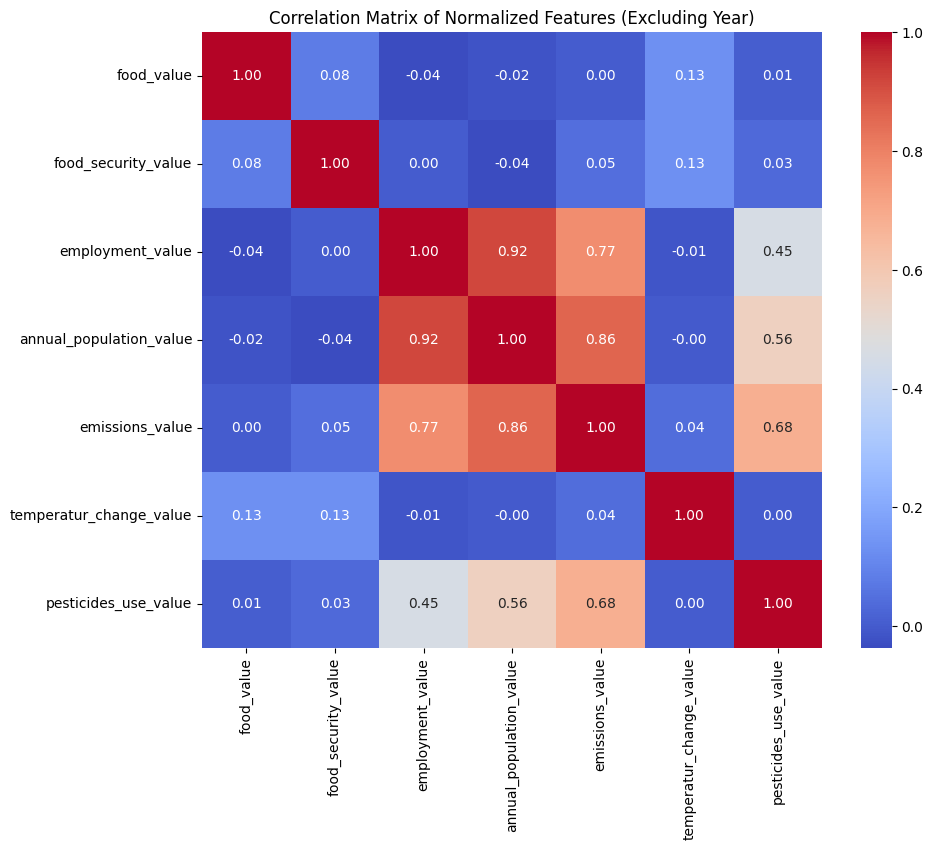

In [ ]:

# show corolation merged_df_normalized


# Calculate the correlation matrix
# Select only numerical columns, excluding 'Year'
numeric_cols = df_imputed.select_dtypes(include=np.number).columns.tolist()
if 'Year' in numeric_cols:
    numeric_cols.remove('Year')
correlation_matrix = df_imputed[numeric_cols].corr()



# Optional: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Normalized Features (Excluding Year)')
plt.show()

In [ ]:
correlation_matrix.to_html('correlation_matrix.html')
print("Correlation matrix saved as correlation_matrix.html")

Correlation matrix saved as correlation_matrix.html
